In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats

In [3]:
gene_list = pd.read_csv('hallmark_surv_curated.csv')
gene_list

,IA,TPI,GIM,SPS,AID,ERI,RCD,EGS,DCE,AIM
0,CCR3,PLCB2,BLM,PAK2,HCST,E2F1,PAK2,PAK2,PRKAG3,CDH15
1,HIF1A,PRKCG,FANCI,GNG3,HIF1A,PIK3CD,IL6R,GNG3,NFE2L2,PAK2
2,PRKCG,TNFAIP3,RECQL4,IL6R,PLCB2,NRAS,PLK1,RBL1,GPI,PLCB2
3,MMP1,CARD11,POLD3,PLCB2,CXCR1,PIK3CG,ELK1,FZD2,HIF1A,FZD2
4,PIK3CD,GNB1,PCNA,PKN3,CCL26,PRKCA,BCL6,WNT3A,PFKP,WNT3A
...,...,...,...,...,...,...,...,...,...,...
202,NaN,NaN,NaN,PIM1,NaN,NaN,NaN,NaN,NaN,NaN
203,NaN,NaN,NaN,CSF3,NaN,NaN,NaN,NaN,NaN,NaN
204,NaN,NaN,NaN,BARD1,NaN,NaN,NaN,NaN,NaN,NaN
205,NaN,NaN,NaN,GNA12,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
meta_neg = pd.read_csv('meta_neg_sep_hallmark.csv', index_col=(0))
meta_neg['sample'] = meta_neg.index.str.split('&').str[0]
meta_neg.index = [f'Negative_{j+1}' for j in range(len(meta_neg.index))]
meta_neg['Class'] = 0
meta_neg

,Cancer,Hallmark,sample,Class
Negative_1,Ovarian,AID,1,0
Negative_2,Breast,AID,1,0
Negative_3,Ovarian,AID,1,0
Negative_4,Prostate,AIM,1,0
Negative_5,Prostate,AIM,1,0
...,...,...,...,...
Negative_39139,Hematologic,ERI,tFL1,0
Negative_39140,Hematologic,IA,tFL1,0
Negative_39141,Hematologic,IA,tFL1,0
Negative_39142,Hematologic,ERI,tFL2,0


In [5]:
meta_pos = pd.read_csv('meta_pos_sep_hallmark.csv', index_col=(0))
meta_pos['sample'] = meta_pos.index.str.split('&').str[0]
meta_pos.index = [f'Positive_{j+1}' for j in range(len(meta_pos.index))]
meta_pos['Class'] = 1
meta_pos

,Cancer,Hallmark,sample,Class
Positive_1,Ovarian,AIM,1,1
Positive_2,Ovarian,AIM,1,1
Positive_3,Ovarian,AIM,1,1
Positive_4,Ovarian,AIM,1,1
Positive_5,Ovarian,AIM,1,1
...,...,...,...,...
Positive_28783,Hematologic,EGS,tFL2,1
Positive_28784,Hematologic,ERI,tFL2,1
Positive_28785,Hematologic,ERI,tFL2,1
Positive_28786,Hematologic,IA,tFL2,1


In [6]:
data_pos = pd.read_csv('data_pos_sep_hallmark.csv',index_col=(0))
data_pos.index = [f'Positive_{j+1}' for j in range(len(data_pos.index))]
data_pos

,NOC2L,HES4,ISG15,AGRN,TNFRSF18,TNFRSF4,SDF4,B3GALT6,UBE2J2,ACAP3,...,AP000676.5,SNHG29,AC090498.1,LRRC75A-AS1,MTCO2P12,C19ORF43,C14ORF2,UQCR11.1,COX1,COX2
Positive_1,91,213,229,12,6,25,119,70,108,8,...,0,0,0,0,0,0,0,0,0,0
Positive_2,109,186,132,15,9,7,132,87,116,11,...,0,0,0,0,0,0,0,0,0,0
Positive_3,125,206,125,22,14,22,154,100,126,14,...,0,0,0,0,0,0,0,0,0,0
Positive_4,112,167,177,20,8,11,145,101,121,13,...,0,0,0,0,0,0,0,0,0,0
Positive_5,109,234,159,15,10,23,141,56,120,10,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Positive_28783,18,3,26,0,20,35,41,4,31,3,...,0,0,0,0,0,0,0,0,0,0
Positive_28784,16,0,13,1,0,0,24,3,23,2,...,0,0,0,0,0,0,0,0,0,0
Positive_28785,29,0,19,0,0,5,32,3,30,2,...,0,0,0,0,0,0,0,0,0,0
Positive_28786,25,0,22,0,8,17,27,3,30,4,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data_neg = pd.read_csv('data_neg_sep_hallmark.csv',index_col=(0))
data_neg.index = [f'Negative_{j+1}' for j in range(len(data_neg.index))]
data_neg

,SAMD11,NOC2L,HES4,ISG15,AGRN,TNFRSF18,TNFRSF4,SDF4,B3GALT6,C1QTNF12,...,PPP1R2C,AC073111.5,AL117339.5,MTCO2P12,MT-RNR1,MT-RNR2,COX1,COX2,COX3,ND4
Negative_1,3,39,66,63,5,3,1,47,22,0,...,0,0,0,0,0,0,0,0,0,0
Negative_2,0,6,5,201,0,65,139,8,0,0,...,0,0,0,0,0,0,0,0,0,0
Negative_3,11,34,79,41,5,6,10,54,13,3,...,0,0,0,0,0,0,0,0,0,0
Negative_4,1,14,36,27,1,0,0,33,4,0,...,0,0,0,0,0,0,0,0,0,0
Negative_5,0,9,35,29,3,0,1,29,3,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Negative_39139,0,12,4,76,0,17,37,14,6,0,...,0,0,0,0,0,0,0,0,0,0
Negative_39140,1,9,2,71,0,11,9,12,2,0,...,0,0,0,0,0,0,0,0,0,0
Negative_39141,0,3,2,129,3,25,34,24,8,0,...,0,0,0,0,0,0,0,0,0,0
Negative_39142,0,22,0,33,0,29,33,33,2,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
common = (list(set(data_pos.columns) & set(data_neg.columns)))
len(common)

9326

In [9]:
data_pos1 = data_pos[common]
data_pos1

,BMPR1A,AASDH,FAM160B2,UBL7,VEGFA,SF3A1,KCNMA1,SNX17,CLEC4E,CD247,...,FBXO33,CDH11,FAM181A,SEMA4A,ALKBH3,DNAH14,RIN3,PRNP,TSHZ2,CLPTM1
Positive_1,6,17,0,4,105,45,68,47,8,0,...,26,67,0,29,15,13,9,247,44,33
Positive_2,2,10,0,5,127,51,94,62,0,7,...,27,74,0,28,11,11,9,309,56,68
Positive_3,8,14,0,10,150,67,59,66,0,3,...,36,62,0,18,14,15,17,315,38,63
Positive_4,5,11,0,5,118,56,93,57,0,0,...,39,67,0,31,18,17,14,307,42,65
Positive_5,7,12,0,9,132,67,120,58,5,1,...,24,68,0,19,17,18,16,315,35,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Positive_28783,4,7,0,25,0,22,3,63,0,63,...,7,0,0,55,0,0,4,13,3,21
Positive_28784,3,12,0,16,0,18,3,54,0,7,...,5,0,0,48,3,0,1,3,0,36
Positive_28785,3,7,0,21,0,27,11,64,0,9,...,6,0,0,55,5,1,0,2,4,20
Positive_28786,4,11,0,22,0,33,2,66,0,20,...,2,0,0,52,5,0,3,10,3,14


In [10]:
data_neg1 = data_neg[common]
data_neg1

,BMPR1A,AASDH,FAM160B2,UBL7,VEGFA,SF3A1,KCNMA1,SNX17,CLEC4E,CD247,...,FBXO33,CDH11,FAM181A,SEMA4A,ALKBH3,DNAH14,RIN3,PRNP,TSHZ2,CLPTM1
Negative_1,3,2,0,2,81,18,97,11,0,9,...,7,37,0,8,4,10,1,96,8,19
Negative_2,0,6,0,10,0,4,0,8,0,40,...,1,0,0,1,2,0,3,16,6,9
Negative_3,2,3,0,3,98,13,131,19,0,5,...,9,41,0,7,4,2,1,113,12,17
Negative_4,0,7,0,4,8,2,0,7,0,0,...,4,0,0,3,2,3,0,3,4,6
Negative_5,2,8,0,8,12,5,0,13,0,0,...,0,1,0,1,2,2,0,5,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Negative_39139,1,3,0,16,1,8,1,25,0,39,...,9,2,0,5,8,2,6,15,18,9
Negative_39140,3,3,0,10,0,10,0,21,0,42,...,9,1,0,3,2,0,6,19,6,9
Negative_39141,3,5,0,8,0,8,2,32,0,37,...,11,2,0,6,5,0,6,15,19,5
Negative_39142,0,10,0,25,0,11,1,60,0,43,...,5,0,0,43,6,1,1,16,5,32


In [11]:
hall_list = ['AIM', 'DCE', 'EGS', 'GIM', 'RCD', 'SPS', 'AID', 'IA', 'ERI', 'TPI']

Fitting size factors...


Using None as control genes, passed at DeseqDataSet initialization


... done in 0.88 seconds.

Fitting dispersions...
... done in 5.26 seconds.

Fitting dispersion trend curve...
... done in 0.28 seconds.

Fitting MAP dispersions...
... done in 4.69 seconds.

Fitting LFCs...
... done in 6.29 seconds.

Calculating cook's distance...
... done in 4.57 seconds.

Replacing 334 outlier genes.

Fitting dispersions...
... done in 0.37 seconds.

Fitting MAP dispersions...
... done in 0.37 seconds.

Fitting LFCs...
... done in 2.05 seconds.

Running Wald tests...
... done in 2.88 seconds.

/data1/miniconda3/envs/tf/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Log2 fold change & Wald test p-value: Class 1 vs 0
           baseMean  log2FoldChange     lfcSE       stat         pvalue  \
BMPR1A     9.644153       -2.644332  0.052025 -50.827865   0.000000e+00   
AASDH      9.346515       -1.253007  0.026891 -46.596204   0.000000e+00   
FAM160B2   5.820858       -0.862557  0.040707 -21.189147   1.202562e-99   
UBL7      15.466748        0.163645  0.022752   7.192690   6.352696e-13   
VEGFA     26.671941        0.039445  0.044043   0.895586   3.704740e-01   
...             ...             ...       ...        ...            ...   
DNAH14    25.118093       -5.149673  0.068566 -75.105050   0.000000e+00   
RIN3      21.782344        1.375174  0.043750  31.432536  7.272973e-217   
PRNP      34.059610        1.016092  0.022243  45.681457   0.000000e+00   
TSHZ2     17.746126       -1.686125  0.052504 -32.114387  2.776597e-226   
CLPTM1    22.963200       -0.300429  0.018226 -16.483475   4.823082e-61   

                   padj  
BMPR1A     0.000000e+0

/tmp/ipykernel_133805/2276412150.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


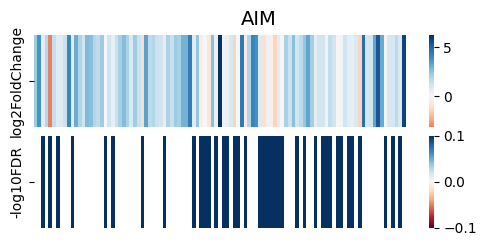

Fitting size factors...


Using None as control genes, passed at DeseqDataSet initialization


... done in 1.13 seconds.

Fitting dispersions...
... done in 5.04 seconds.

Fitting dispersion trend curve...
... done in 0.25 seconds.

Fitting MAP dispersions...
... done in 4.81 seconds.

Fitting LFCs...
... done in 4.76 seconds.

Calculating cook's distance...
... done in 5.17 seconds.

Replacing 284 outlier genes.

Fitting dispersions...
... done in 0.33 seconds.

Fitting MAP dispersions...
... done in 0.31 seconds.

Fitting LFCs...
... done in 1.58 seconds.

Running Wald tests...
... done in 3.00 seconds.

/data1/miniconda3/envs/tf/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Log2 fold change & Wald test p-value: Class 1 vs 0
           baseMean  log2FoldChange     lfcSE       stat         pvalue  \
BMPR1A    15.622301       -3.011197  0.046249 -65.108142   0.000000e+00   
AASDH     12.021986       -1.584925  0.024991 -63.419918   0.000000e+00   
FAM160B2   7.792344       -1.566278  0.035015 -44.731199   0.000000e+00   
UBL7      15.681153        0.456181  0.021772  20.952816   1.768569e-97   
VEGFA     30.328092        1.136810  0.041687  27.270099  9.601062e-164   
...             ...             ...       ...        ...            ...   
DNAH14    36.211110       -3.968655  0.065545 -60.548764   0.000000e+00   
RIN3      22.032466       -1.115994  0.038500 -28.987218  9.535449e-185   
PRNP      36.325550        0.396439  0.022265  17.805786   6.373176e-71   
TSHZ2     30.175507       -2.572474  0.045102 -57.037175   0.000000e+00   
CLPTM1    25.985603       -0.329903  0.019960 -16.527894   2.310775e-61   

                   padj  
BMPR1A     0.000000e+0

/tmp/ipykernel_133805/2276412150.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


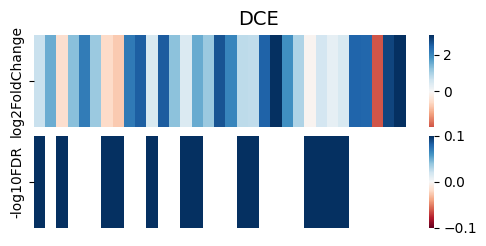

Fitting size factors...


Using None as control genes, passed at DeseqDataSet initialization


... done in 1.01 seconds.

Fitting dispersions...
... done in 4.65 seconds.

Fitting dispersion trend curve...
... done in 0.19 seconds.

Fitting MAP dispersions...
... done in 4.09 seconds.

Fitting LFCs...
... done in 4.52 seconds.

Calculating cook's distance...
... done in 4.60 seconds.

Replacing 335 outlier genes.

Fitting dispersions...
... done in 0.37 seconds.

Fitting MAP dispersions...
... done in 0.38 seconds.

Fitting LFCs...
... done in 1.56 seconds.

Running Wald tests...
... done in 2.61 seconds.

/data1/miniconda3/envs/tf/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Log2 fold change & Wald test p-value: Class 1 vs 0
           baseMean  log2FoldChange     lfcSE       stat         pvalue  \
BMPR1A    11.300060       -2.219731  0.057332 -38.717047   0.000000e+00   
AASDH      9.579369       -1.271569  0.029518 -43.078229   0.000000e+00   
FAM160B2   6.185572       -1.064675  0.043032 -24.741273  3.848920e-135   
UBL7      15.505402       -0.167361  0.021902  -7.641379   2.149080e-14   
VEGFA     26.194572        0.048535  0.047411   1.023719   3.059679e-01   
...             ...             ...       ...        ...            ...   
DNAH14    22.063822       -4.278676  0.073096 -58.535172   0.000000e+00   
RIN3      23.925182        0.817639  0.042771  19.116705   1.833306e-81   
PRNP      38.574123        0.594850  0.022677  26.230908  1.180471e-151   
TSHZ2     24.168287        0.064228  0.056972   1.127378   2.595828e-01   
CLPTM1    23.652784       -0.542050  0.018393 -29.471238  6.729205e-191   

                   padj  
BMPR1A     0.000000e+0

/tmp/ipykernel_133805/2276412150.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


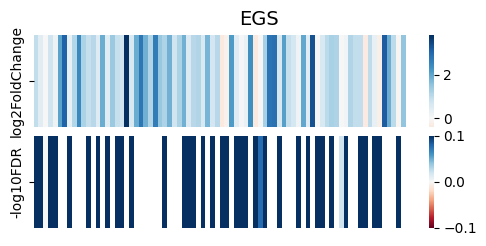

Fitting size factors...


Using None as control genes, passed at DeseqDataSet initialization


... done in 0.23 seconds.

Fitting dispersions...
... done in 2.14 seconds.

Fitting dispersion trend curve...
... done in 0.21 seconds.

Fitting MAP dispersions...
... done in 2.09 seconds.

Fitting LFCs...
... done in 2.25 seconds.

Calculating cook's distance...
... done in 1.09 seconds.

Replacing 403 outlier genes.

Fitting dispersions...
... done in 0.64 seconds.

Fitting MAP dispersions...
... done in 0.63 seconds.

Fitting LFCs...
... done in 0.82 seconds.

Running Wald tests...
... done in 1.45 seconds.

/data1/miniconda3/envs/tf/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Log2 fold change & Wald test p-value: Class 1 vs 0
           baseMean  log2FoldChange     lfcSE       stat        pvalue  \
BMPR1A    14.029293        0.879484  0.107787   8.159455  3.365396e-16   
AASDH     11.473784        0.521262  0.069743   7.474077  7.774735e-14   
FAM160B2   6.898203       -0.421874  0.083538  -5.050097  4.415869e-07   
UBL7      15.578815        0.033799  0.038883   0.869233  3.847198e-01   
VEGFA     17.684771       -1.093310  0.086044 -12.706462  5.444240e-37   
...             ...             ...       ...        ...           ...   
DNAH14    35.035649        2.859496  0.142755  20.030846  2.965746e-89   
RIN3      13.857509        0.204489  0.091699   2.230002  2.574733e-02   
PRNP      28.804016       -0.666204  0.051903 -12.835452  1.037959e-37   
TSHZ2     58.433581        0.436814  0.122107   3.577291  3.471742e-04   
CLPTM1    24.388315        0.220041  0.049288   4.464400  8.029335e-06   

                  padj  
BMPR1A    7.343542e-16  
AASDH     

/tmp/ipykernel_133805/2276412150.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


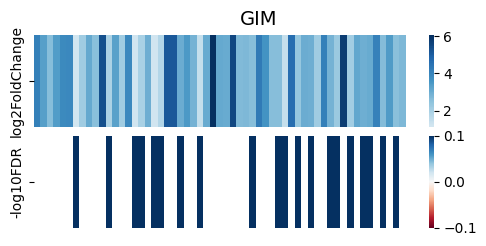

Fitting size factors...


Using None as control genes, passed at DeseqDataSet initialization


... done in 0.78 seconds.

Fitting dispersions...
... done in 4.03 seconds.

Fitting dispersion trend curve...
... done in 0.27 seconds.

Fitting MAP dispersions...
... done in 3.71 seconds.

Fitting LFCs...
... done in 3.55 seconds.

Calculating cook's distance...
... done in 2.74 seconds.

Replacing 396 outlier genes.

Fitting dispersions...
... done in 0.50 seconds.

Fitting MAP dispersions...
... done in 0.54 seconds.

Fitting LFCs...
... done in 1.25 seconds.

Running Wald tests...
... done in 2.76 seconds.

/data1/miniconda3/envs/tf/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Log2 fold change & Wald test p-value: Class 1 vs 0
           baseMean  log2FoldChange     lfcSE       stat         pvalue  \
BMPR1A    11.377628       -2.503033  0.067441 -37.114574  1.635242e-301   
AASDH     10.406648       -1.269217  0.033507 -37.879274   0.000000e+00   
FAM160B2   6.040760       -1.022246  0.050550 -20.222592   6.194113e-91   
UBL7      16.574873       -0.194952  0.025239  -7.724167   1.125873e-14   
VEGFA     30.187848        0.866278  0.050714  17.081523   2.037322e-65   
...             ...             ...       ...        ...            ...   
DNAH14    25.727943       -4.714213  0.085840 -54.918865   0.000000e+00   
RIN3      27.926588        0.984189  0.048925  20.116359   5.306450e-90   
PRNP      42.839095        1.000665  0.022942  43.617567   0.000000e+00   
TSHZ2     18.411870       -1.275983  0.061156 -20.864298   1.130431e-96   
CLPTM1    24.598397       -0.375388  0.020892 -17.967949   3.473174e-72   

                   padj  
BMPR1A    1.459042e-30

/tmp/ipykernel_133805/2276412150.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


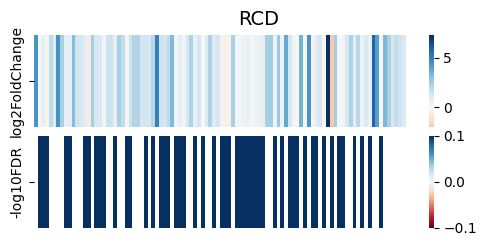

Fitting size factors...


Using None as control genes, passed at DeseqDataSet initialization


... done in 0.98 seconds.

Fitting dispersions...
... done in 4.54 seconds.

Fitting dispersion trend curve...
... done in 0.21 seconds.

Fitting MAP dispersions...
... done in 4.26 seconds.

Fitting LFCs...
... done in 5.22 seconds.

Calculating cook's distance...
... done in 4.71 seconds.

Replacing 289 outlier genes.

Fitting dispersions...
... done in 0.30 seconds.

Fitting MAP dispersions...
... done in 0.36 seconds.

Fitting LFCs...
... done in 1.60 seconds.

Running Wald tests...
... done in 2.89 seconds.

/data1/miniconda3/envs/tf/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Log2 fold change & Wald test p-value: Class 1 vs 0
           baseMean  log2FoldChange     lfcSE       stat         pvalue  \
BMPR1A    10.783926       -2.946278  0.052295 -56.339552   0.000000e+00   
AASDH      9.381476       -1.354183  0.025710 -52.671510   0.000000e+00   
FAM160B2   5.892627       -1.204581  0.039931 -30.166554  6.507211e-200   
UBL7      15.625473        0.044673  0.023849   1.873199   6.104095e-02   
VEGFA     26.049144        0.239464  0.044253   5.411251   6.258606e-08   
...             ...             ...       ...        ...            ...   
DNAH14    21.942218       -4.948015  0.068460 -72.275597   0.000000e+00   
RIN3      21.929231        1.238289  0.041680  29.709396  5.806670e-194   
PRNP      36.539369        0.825362  0.022103  37.341429  3.492748e-305   
TSHZ2     21.584756       -1.679933  0.054498 -30.825333  1.199557e-208   
CLPTM1    22.605847       -0.417670  0.016948 -24.643807  4.288081e-134   

                   padj  
BMPR1A     0.000000e+0

/tmp/ipykernel_133805/2276412150.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


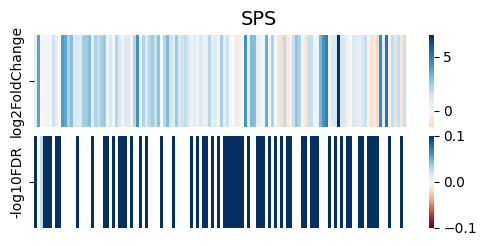

Fitting size factors...


Using None as control genes, passed at DeseqDataSet initialization


... done in 0.98 seconds.

Fitting dispersions...
... done in 4.49 seconds.

Fitting dispersion trend curve...
... done in 0.24 seconds.

Fitting MAP dispersions...
... done in 4.33 seconds.

Fitting LFCs...
... done in 6.33 seconds.

Calculating cook's distance...
... done in 3.81 seconds.

Replacing 307 outlier genes.

Fitting dispersions...
... done in 0.38 seconds.

Fitting MAP dispersions...
... done in 0.39 seconds.

Fitting LFCs...
... done in 2.19 seconds.

Running Wald tests...
... done in 2.47 seconds.

/data1/miniconda3/envs/tf/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Log2 fold change & Wald test p-value: Class 1 vs 0
           baseMean  log2FoldChange     lfcSE       stat         pvalue  \
BMPR1A    12.272369       -3.319177  0.058912 -56.340831   0.000000e+00   
AASDH     11.041367       -1.305538  0.030145 -43.309188   0.000000e+00   
FAM160B2   6.705657       -1.263305  0.043181 -29.255821  3.786495e-188   
UBL7      16.503016        0.034132  0.023205   1.470857   1.413298e-01   
VEGFA     28.176220        0.370801  0.043251   8.573198   1.006504e-17   
...             ...             ...       ...        ...            ...   
DNAH14    31.820331       -6.046646  0.074812 -80.824098   0.000000e+00   
RIN3      27.166609        1.596099  0.046085  34.633457  7.926791e-263   
PRNP      39.727007        0.731145  0.024507  29.833657  1.430485e-195   
TSHZ2     27.913954       -4.205800  0.064051 -65.662958   0.000000e+00   
CLPTM1    26.397020       -0.542139  0.020899 -25.941020  2.296147e-148   

                   padj  
BMPR1A     0.000000e+0

/tmp/ipykernel_133805/2276412150.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


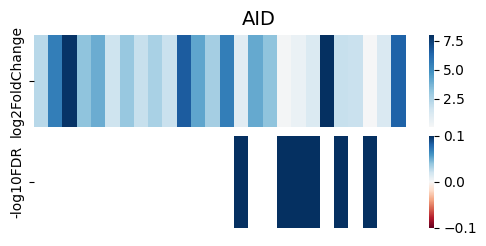

Fitting size factors...


Using None as control genes, passed at DeseqDataSet initialization


... done in 1.04 seconds.

Fitting dispersions...
... done in 4.72 seconds.

Fitting dispersion trend curve...
... done in 0.23 seconds.

Fitting MAP dispersions...
... done in 4.67 seconds.

Fitting LFCs...
... done in 5.06 seconds.

Calculating cook's distance...
... done in 3.79 seconds.

Replacing 387 outlier genes.

Fitting dispersions...
... done in 0.45 seconds.

Fitting MAP dispersions...
... done in 0.45 seconds.

Fitting LFCs...
... done in 1.57 seconds.

Running Wald tests...
... done in 2.89 seconds.

/data1/miniconda3/envs/tf/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Log2 fold change & Wald test p-value: Class 1 vs 0
           baseMean  log2FoldChange     lfcSE       stat         pvalue  \
BMPR1A     7.645519       -1.323527  0.064547 -20.504881   1.947472e-93   
AASDH      7.520046       -1.011346  0.033038 -30.611225  8.677788e-206   
FAM160B2   4.715649       -0.585177  0.047040 -12.439866   1.587709e-35   
UBL7      11.910904       -0.467939  0.023468 -19.939873   1.835301e-88   
VEGFA     18.900614        1.544714  0.049761  31.042587  1.436454e-211   
...             ...             ...       ...        ...            ...   
DNAH14    15.897586       -2.599212  0.089195 -29.140870  1.090416e-186   
RIN3      15.238229        1.203107  0.043746  27.501822  1.669730e-166   
PRNP      27.731270        0.964912  0.022784  42.349749   0.000000e+00   
TSHZ2     30.153951       -0.819371  0.064982 -12.609281   1.876982e-36   
CLPTM1    17.384831       -0.258184  0.021903 -11.787750   4.514387e-32   

                   padj  
BMPR1A     5.764517e-9

/tmp/ipykernel_133805/2276412150.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


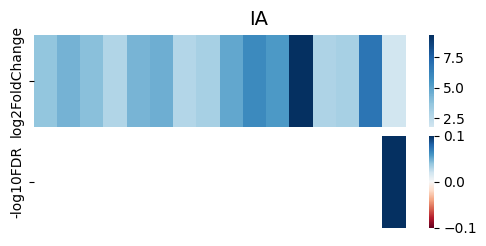

Fitting size factors...


Using None as control genes, passed at DeseqDataSet initialization


... done in 1.14 seconds.

Fitting dispersions...
... done in 6.72 seconds.

Fitting dispersion trend curve...
... done in 0.24 seconds.

Fitting MAP dispersions...
... done in 5.88 seconds.

Fitting LFCs...
... done in 5.69 seconds.

Calculating cook's distance...
... done in 5.40 seconds.

Replacing 335 outlier genes.

Fitting dispersions...
... done in 0.45 seconds.

Fitting MAP dispersions...
... done in 0.37 seconds.

Fitting LFCs...
... done in 1.74 seconds.

Running Wald tests...
... done in 3.56 seconds.

/data1/miniconda3/envs/tf/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Log2 fold change & Wald test p-value: Class 1 vs 0
           baseMean  log2FoldChange     lfcSE       stat         pvalue  \
BMPR1A     7.574483        1.089893  0.044247  24.632061  5.729982e-134   
AASDH      8.192266        0.194714  0.023626   8.241666   1.698295e-16   
FAM160B2   5.193762        0.098419  0.034218   2.876215   4.024758e-03   
UBL7      15.068354       -0.229092  0.018513 -12.374394   3.595964e-35   
VEGFA     21.850453        0.535512  0.039697  13.490033   1.790205e-41   
...             ...             ...       ...        ...            ...   
DNAH14    12.889601        1.479727  0.064303  23.011889  3.543964e-117   
RIN3      15.386772        1.470412  0.032789  44.845051   0.000000e+00   
PRNP      31.991815        0.363470  0.019392  18.743656   2.181137e-78   
TSHZ2     27.893724        0.832304  0.046270  17.988110   2.414550e-72   
CLPTM1    20.649384       -0.003444  0.015886  -0.216818   8.283505e-01   

                   padj  
BMPR1A    2.639642e-13

/tmp/ipykernel_133805/2276412150.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


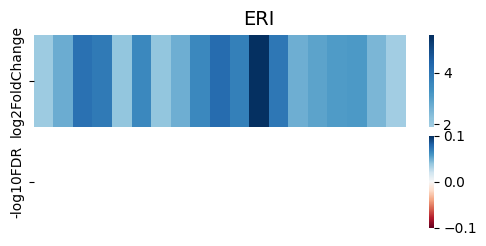

Fitting size factors...


Using None as control genes, passed at DeseqDataSet initialization


... done in 0.96 seconds.

Fitting dispersions...
... done in 4.69 seconds.

Fitting dispersion trend curve...
... done in 0.26 seconds.

Fitting MAP dispersions...
... done in 4.45 seconds.

Fitting LFCs...
... done in 6.10 seconds.

Calculating cook's distance...
... done in 4.41 seconds.

Replacing 306 outlier genes.

Fitting dispersions...
... done in 0.29 seconds.

Fitting MAP dispersions...
... done in 0.31 seconds.

Fitting LFCs...
... done in 2.50 seconds.

Running Wald tests...
... done in 1.82 seconds.

/data1/miniconda3/envs/tf/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Log2 fold change & Wald test p-value: Class 1 vs 0
           baseMean  log2FoldChange     lfcSE       stat         pvalue  \
BMPR1A     9.411642       -2.595294  0.049194 -52.756256   0.000000e+00   
AASDH     10.118774       -0.730165  0.025943 -28.145264  2.738588e-174   
FAM160B2   6.078497       -0.768275  0.037316 -20.588518   3.478461e-94   
UBL7      18.293779       -0.005217  0.023088  -0.225973   8.212223e-01   
VEGFA     33.479691        0.322679  0.041022   7.866004   3.661479e-15   
...             ...             ...       ...        ...            ...   
DNAH14    17.273400       -4.624876  0.065629 -70.469760   0.000000e+00   
RIN3      20.662118        2.764443  0.041509  66.598277   0.000000e+00   
PRNP      41.621089        1.033150  0.026039  39.677281   0.000000e+00   
TSHZ2     35.217358       -4.337295  0.067318 -64.429871   0.000000e+00   
CLPTM1    26.289247       -0.257893  0.017698 -14.571767   4.247585e-48   

                   padj  
BMPR1A     0.000000e+0

/tmp/ipykernel_133805/2276412150.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


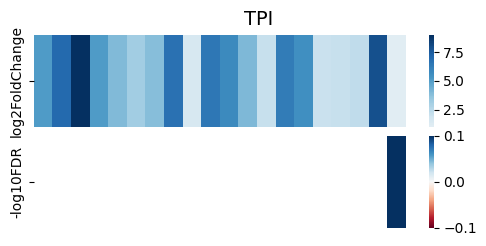

In [13]:
for i in hall_list:
    meta_net = pd.concat([meta_pos[meta_pos['Hallmark'] == i], meta_neg[meta_neg['Hallmark'] == i]])
    data_net = pd.concat([data_pos1[data_pos1.index.isin(meta_net.index)], data_neg1[data_neg1.index.isin(meta_net.index)]])
    inference = DefaultInference(n_cpus=20)
    dds = DeseqDataSet(
        counts=data_net,
        metadata=meta_net,
        design="~Class",
        refit_cooks=True,
        inference=inference,
        n_cpus=20, # n_cpus can be specified here or in the inference object
    )
    dds.deseq2()
    ds = DeseqStats(dds, contrast=["Class", 1, 0], inference=inference)
    ds.summary()
    req_gene = gene_list[i].dropna().to_list()
    ds.results_df = ds.results_df[ds.results_df.index.isin(req_gene)].reset_index()
    ds.results_df['-log10FDR'] = -np.log10(ds.results_df['pvalue'])
    # Create the figure
    fig, axs = plt.subplots(2, 1, figsize=(6, 2.5), sharex=True,
                            gridspec_kw={'height_ratios': [1, 1], 'hspace': 0.1})
    fig.suptitle(i, fontsize=14)

    ds.results_df[['log2FoldChange', '-log10FDR']].to_csv('data_volcano_{}.csv'.format(i))
    # First row: log2FoldChange
    sns.heatmap(
        ds.results_df[['log2FoldChange']].T,
        ax=axs[0],
        cmap='RdBu',
        cbar=True,
        center=0,
        annot=False,
        fmt=".1f"
    )
    axs[0].set_ylabel('')
    axs[0].tick_params(bottom=False, labelbottom=False)
    
    # Second row: -log10fdr
    sns.heatmap(
        ds.results_df[['-log10FDR']].T,
        ax=axs[1],
        cmap='RdBu',
        cbar=True,
        annot=False,
        fmt=".1f"
    )
    axs[1].set_ylabel('')
    axs[1].tick_params(bottom=False, labelbottom=False)    
    plt.tight_layout()
    plt.savefig('volcano_{}.png'.format(i), bbox_inches='tight', dpi=1200)
    plt.show()